# Convolutional Neural Network to Classify Images from CIFAR10 Database

### 1. Load CIFAR10 Dataset

CIFAR10 is one of the most famous datasets in the field of machine learning
 - It has 60,000 images
 - Very straight forward to download
 - Images dimensions are 32x32
 - Colour images
 - 10 classes

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2024-05-18 21:27:37.458558: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 21:27:37.459963: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 21:27:37.505972: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 21:27:37.720352: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 21:27:38.753578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

### 2. Data Visualization

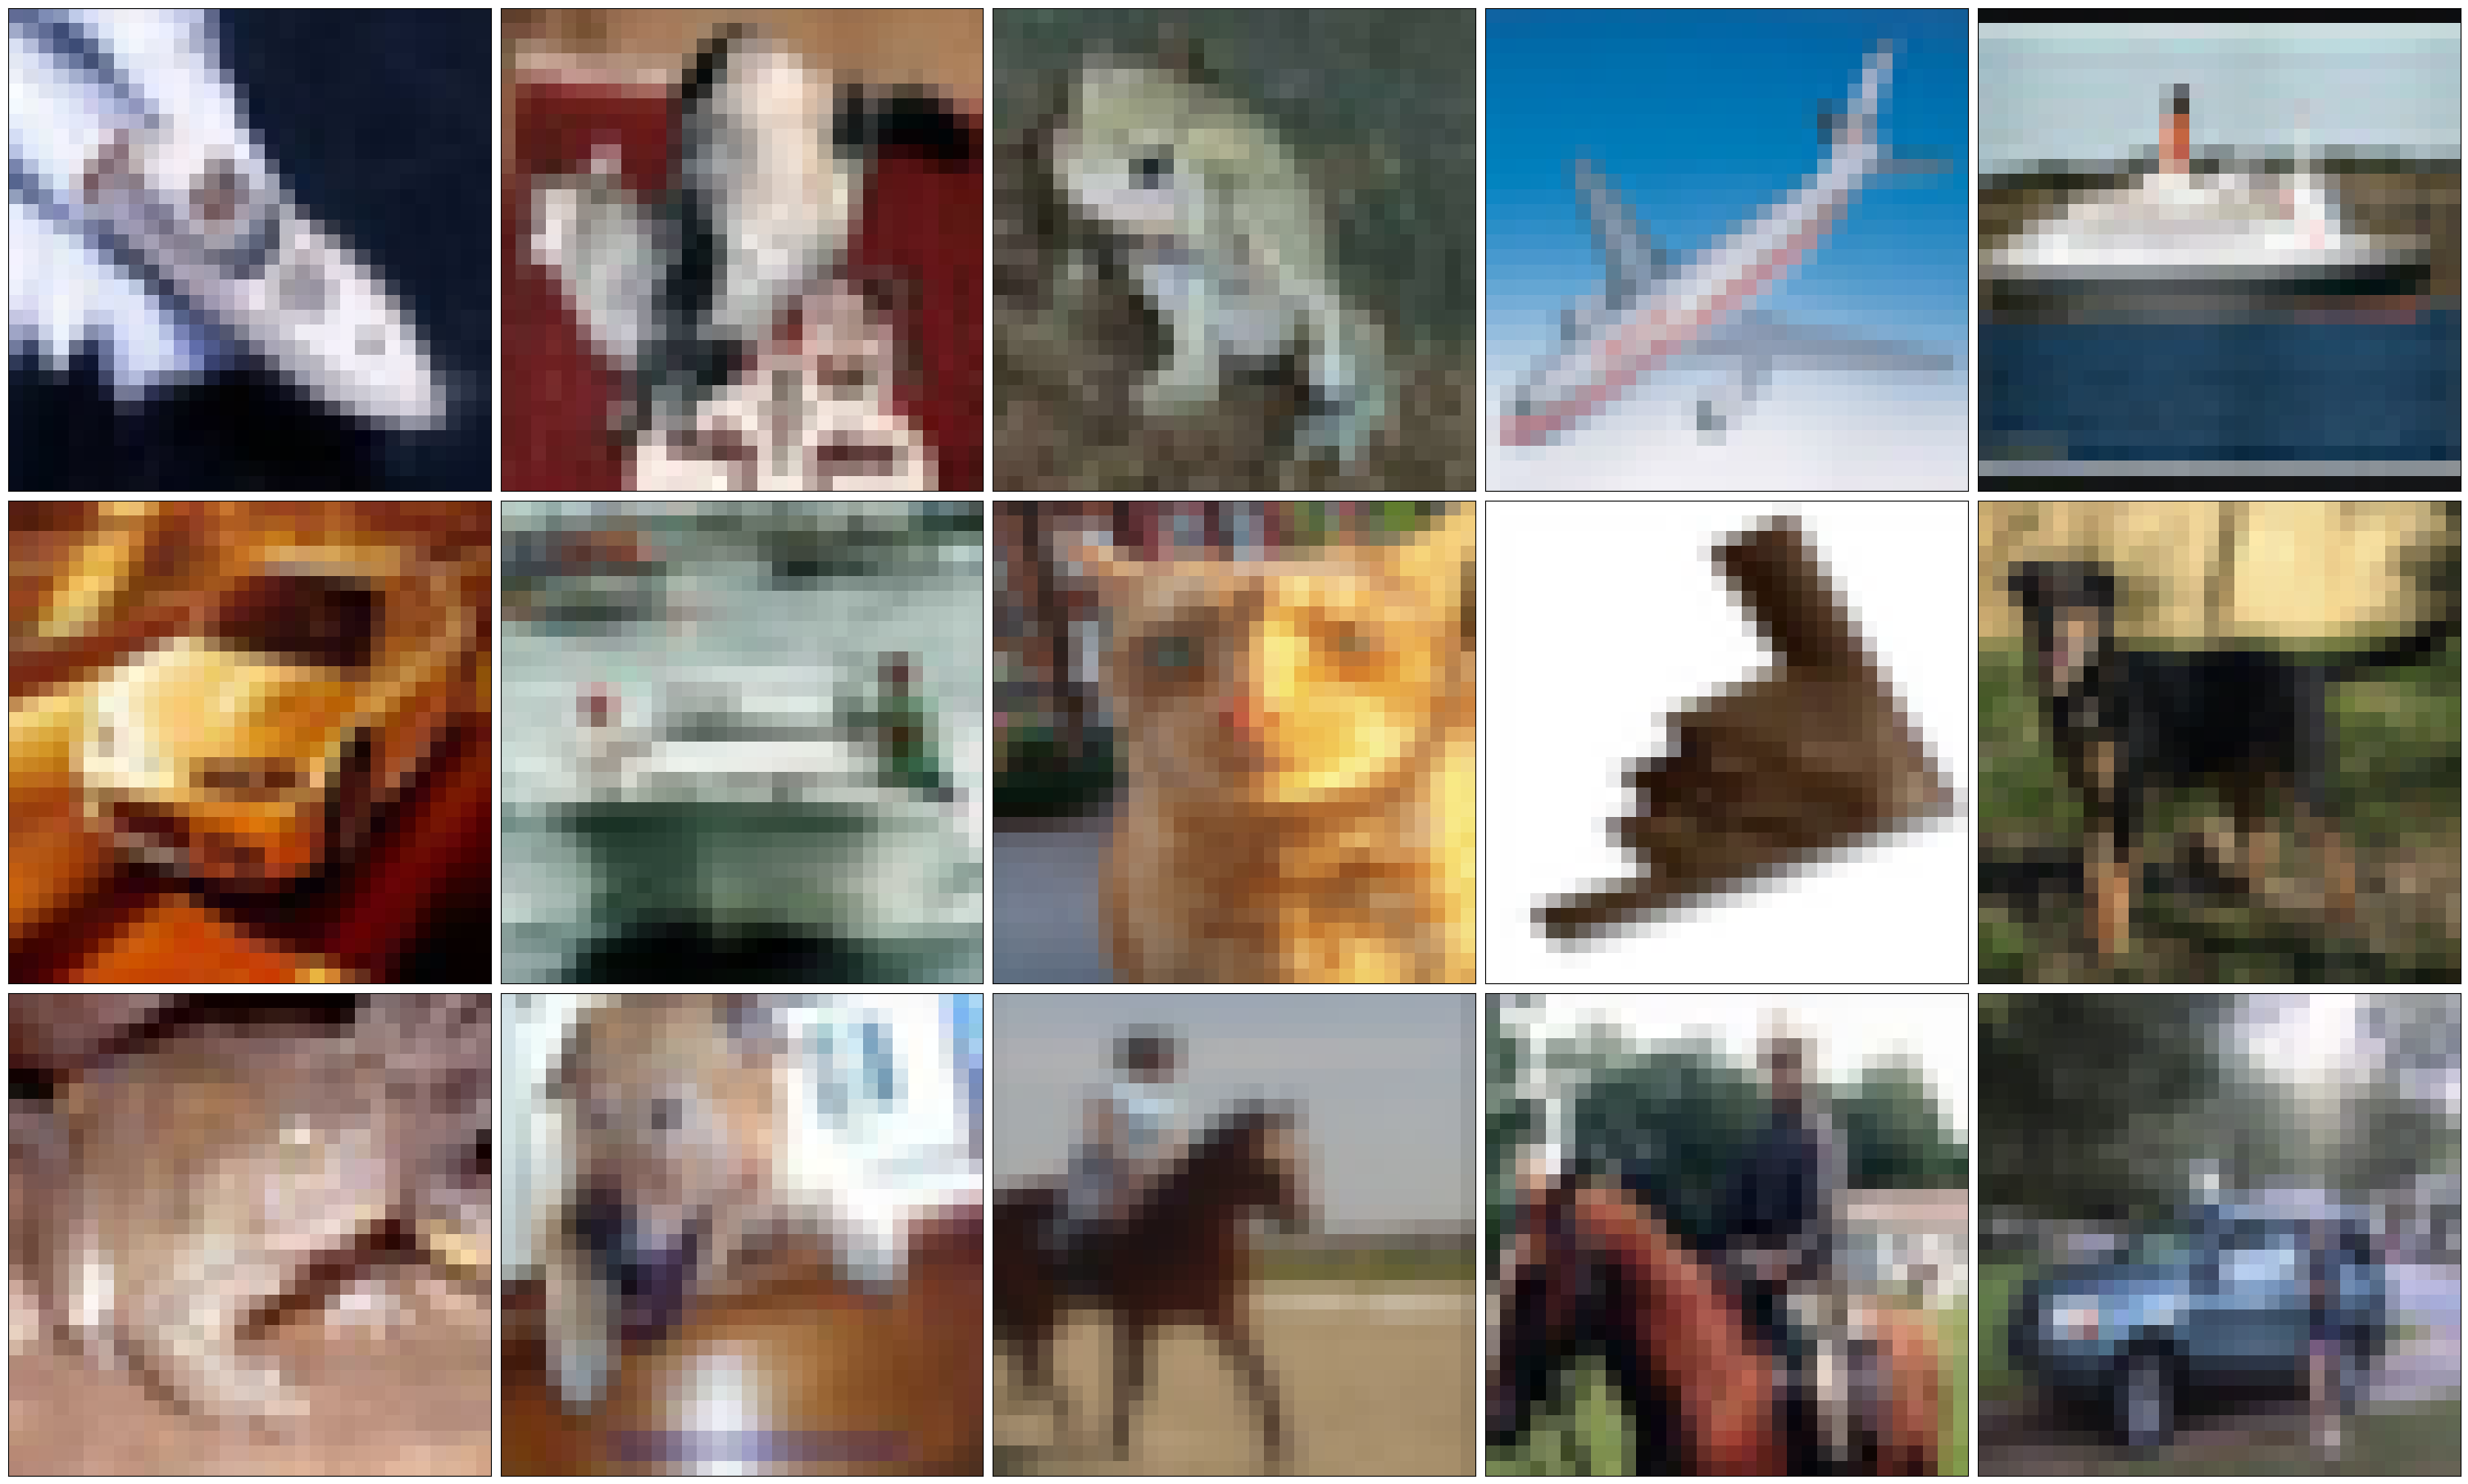

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
 
plt.show()

### 3. Rescale the Images

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

### 4. One-Hot Encoding for Labels

In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 5. Split Data (validation data)

In [6]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

### 6. Model Architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

/home/angelo/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### 7. Compile the Model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Train the Model

In [117]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='cifar10_cnn.model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid),
                 callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.48892, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 16s - 12ms/step - accuracy: 0.4157 - loss: 1.6086 - val_accuracy: 0.4800 - val_loss: 1.4889
Epoch 2/100

Epoch 2: val_loss improved from 1.48892 to 1.19510, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 15s - 11ms/step - accuracy: 0.5346 - loss: 1.2945 - val_accuracy: 0.5714 - val_loss: 1.1951
Epoch 3/100

Epoch 3: val_loss improved from 1.19510 to 1.11187, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 15s - 11ms/step - accuracy: 0.5857 - loss: 1.1659 - val_accuracy: 0.6000 - val_loss: 1.1119
Epoch 4/100

Epoch 4: val_loss improved from 1.11187 to 1.01803, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 15s - 11ms/step - accuracy: 0.6145 - loss: 1.0870 - val_accuracy: 0.6528 - val_loss: 1.0180
Epoch 5/100

Epoch 5: val_loss did not improve from 1.01803
1407/1407 - 15s - 11ms/step - accuracy: 0.6386 - loss: 1

### 9. Load Best Weights

In [39]:
model.load_weights('cifar10_cnn.model.weights.best.keras')

### 10. Accuracy on Test Set

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {round(100*score[0],4)}%\nTest Accuracy: {round(100*score[1],4)}%")

Test Loss: 89.341%
Test Accuracy: 69.48%


### 11. Visualize Some Predicitions

In [11]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
y_hat[0]

array([0.0124937 , 0.02612831, 0.01321176, 0.5825857 , 0.00548139,
       0.2140469 , 0.04089816, 0.00304902, 0.09379359, 0.0083115 ],
      dtype=float32)

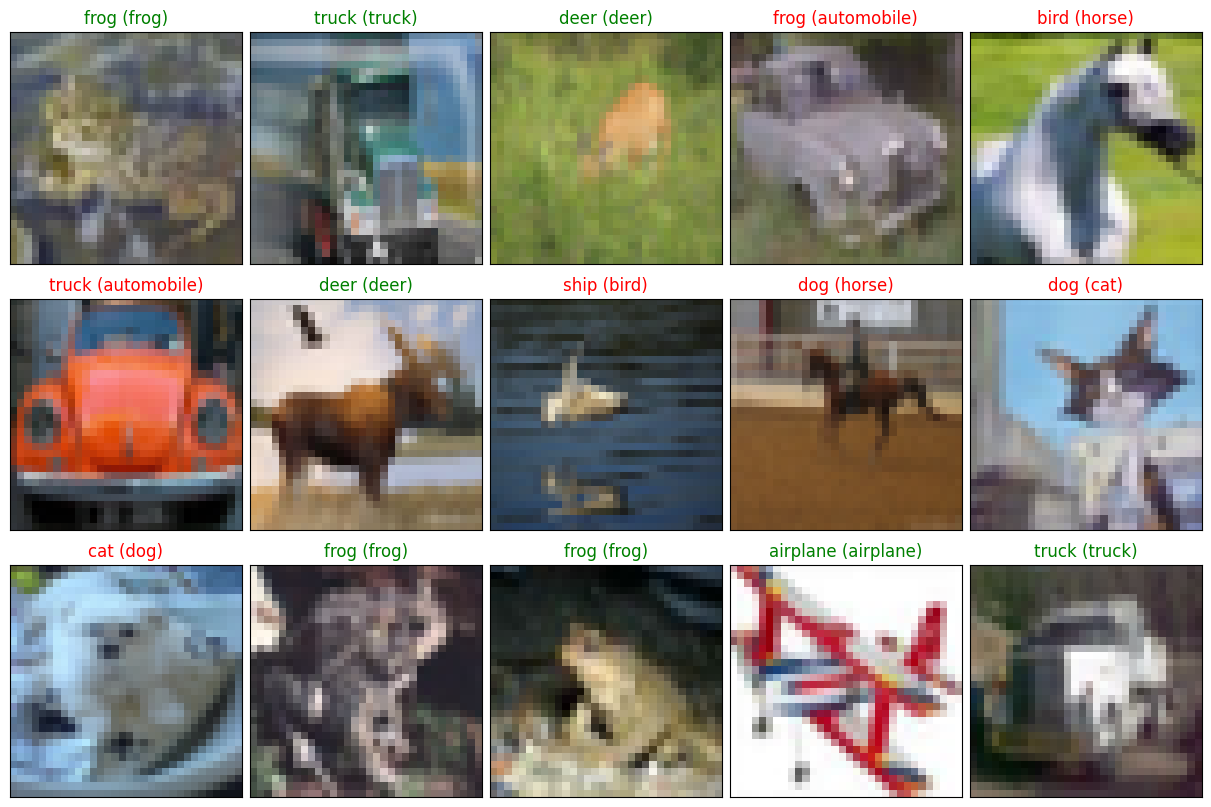

In [37]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(12,8))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_test[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{0} ({1})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                          color='green' if pred_idx == true_idx else 'red')